## anlysing paper abstracts using NLP

In [1]:
!pip install wordcloud

In [2]:
from nltk import word_tokenize
import numpy as np
from metapub import PubMedFetcher

from sklearn.cluster import KMeans
from sklearn import datasets
from wordcloud import WordCloud
from collections import Counter 
from nltk.corpus import stopwords

2020-10-15 17:35:51 Med-PC13 metapub.config[24360] WARNING NCBI_API_KEY was not set.


https://pypi.org/project/metapub/

* try tf11d encoder
* filter stop words and punctuation
* cluster abstracts [done]
* cluster using my own k-means algo [seperate blog post] [done]
* find the most common words in the clusters and return the words [done]
* visualise most common words of each cluster with word cloud [done]
* create desktop application with electron [seperate blog post]

n the clustering problem, we are given a training set ${x^{(1)}, ... , x^{(m)}}$, and want to group the data into a few cohesive "clusters." Here, we are given feature vectors for each data point $x^{(i)} \in \mathbb{R}^n$ as usual; but no labels $y^{(i)}$ (making this an unsupervised learning problem). Our goal is to predict $k$ centroids and a label $c^{(i)}$ for each datapoint. The k-means clustering algorithm is as follows:

In [3]:
data = datasets.load_iris()

In [4]:
data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
data['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
class KMeans(object):

    def __init__(self, number_of_clusters, number_iterations):
        self.k = number_of_clusters
        self.num_iter = number_iterations

    def kmeans(self, data):
        self.data = data

        centroids = self.get_start_centroids()



        for i in range(self.num_iter):
                labels = self.getLabels(centroids)
                centroids = self.getCentroids(labels)

        self.centroids = centroids 
        self.labels = labels

    def getLabels(self, centroids):
        
        '''
        gets labels based on defined centroids
        
        Paramters
        ---------
        centroids : numpy array
            shape (number of clusters, number of features) defines 
            location of centrods that classify datapoints
            
        Returns
        -------
        labels : numpy array
            shape (number of observations, 1), contains predictions 
            for datapoints based on closest location to centroids
        '''

        distances = []

        for row in range(centroids.shape[0]):
            
            centroid = centroids[row, :]
            
            dis = np.power(np.sum(np.power(self.data - centroid, 2), axis = 1), 0.5)
            distances.append(dis)

        out = np.vstack(distances)
        labels = np.argmin(out, axis = 0)
        
        return(labels)

    def getCentroids(self, labels):
        
        '''
        get centroids based on new labels
        
        Parameters
        ----------
        labels : numpy array
            shape (number of observations, 1), contains predictions 
            for datapoints based on closest location to centroids
        
        Returns
        -------
        centroids : numpy array
            shape (number of clusters, number of features) defines 
            location of centrods that classify datapoints
        '''


        centroids = np.zeros(shape=(self.k, self.data.shape[1]))

        for label in range(self.k):


            centroids[label, :] = np.mean(self.data[labels == label, :], axis =0)
            
        try:    
            #if there are nans because no observations are assigned to a given label then reinitialise centroid
            centroids[np.isnan(centroids)] = np.mean(self.data, axis = 0)
        except:
            pass

        return(centroids)
    
    def get_start_centroids(self):
        
        '''
        generates random coordinates of centroids sampling from 
        normal distribution with same mean and standard 
        deviation as feature data
        
        parameters
        ----------
        None
        
        Returns
        -------
        starting : numpy array   
            shape (number of clusters, number of features) defines 
            location of random centroids   
            
        '''
        average = np.mean(self.data)
        std = np.std(self.data)
        
        starting = np.zeros(shape = (self.k, self.data.shape[1]))
        
        for row in range(self.k):
            
            noise = np.random.normal(average, std, (1, self.data.shape[1]))
            
            starting[row, :] = noise
            
        return(starting)
            
            
        

In [62]:

class ClusterAbstract(object):
    
    def __init__(self):
 
        self.stop_words = stopwords.words('english')
    
    def get(self, query, limit):
 
        fetch = PubMedFetcher()
        
        self.IDs = fetch.pmids_for_query(query, retmax = limit)
        
        self.abstracts = []
        self.titles = []
        for c, i_d in enumerate(self.IDs):
            
            print(f'fetching {c}')
            try:
                article = fetch.article_by_pmid(i_d)

            except:
                print(f'id {i_d} doesnt exist')
                continue
            if article.abstract is not None:
                self.abstracts.append(article.abstract)
                self.titles.append(article.title)
            else:
                continue
        
    def count_tokens(self):

        global_bow = {}
        for abstract in self.tokens_data:
            for token in abstract:
                if token in list(global_bow.keys()):
                    global_bow[token] +=1
                else: 
                    global_bow[token] = 1
        self.global_bow = global_bow

    
    def __encode(self, tokenized):
        feature = np.array([])
        for key, value in self.global_bow.items():
            if key in tokenized:
                feature = np.append(feature, value)
            else:
                feature = np.append(feature, 0)

        return(feature)

    def process_data(self):
        self.abstracts = [c for c in self.abstracts if c != None]
        
        tokens_data = []
        for abstract in self.abstracts:
            tokens = word_tokenize(abstract)
            tokens = [c.lower() for c in tokens if c not in self.stop_words and c.isalpha()]
            tokens_data.append(tokens)
        
        self.tokens_data = tokens_data
        
    def encode_data(self):
        self.count_tokens()
        self.encodings = []
        for bow in self.tokens_data:
            self.encodings.append(self.__encode(bow))
        self.encodings = np.vstack(self.encodings)

        
    def get_cluster_enriched_words(self):

        pass
   
    def cluster_data(self, number_clusters):
        
        clusters = list(range(number_clusters))
        
        self.model = KMeans(number_clusters, 10000)

        self.model.kmeans(self.encodings)
        
   
    def generate_word_clouds(self):
        self.word_clouds = []
        
        for i in self.most_frequent:
            wordcloud = WordCloud()
      
            self.word_clouds.append(wordcloud.generate(' '.join(i)))
 

    def analyse_clusters(self):
        
        self.most_frequent = []
     
        
        for label in set(self.model.labels):
            
            #how do I filter a list with list of booleans
            data = [self.tokens_data[i] for i in range(len(self.tokens_data)) if self.model.labels[i] == label]
            print(f'len data {len(data)}')
            
          
            
            all_words_for_label = []
            for observation in data:

                all_words_for_label.extend(observation)


            mf = self.get_frequent_words(all_words_for_label, 10)
            
            self.most_frequent.append(mf)
    
    def get_frequent_words(self, List, top_n): 
        
        occurence_count = Counter(List) 
        ans = occurence_count.most_common(top_n)
        ans = [c[0] for c in ans]

        return(ans)
  

            
            
            


In [93]:
test = ClusterAbstract()

test.get('sex', '30')

fetching 0
fetching 1
fetching 2
fetching 3
fetching 4
fetching 5
fetching 6
fetching 7
fetching 8
fetching 9
fetching 10
fetching 11
fetching 12
fetching 13
fetching 14
fetching 15
fetching 16
fetching 17
fetching 18
fetching 19
fetching 20
fetching 21
fetching 22
fetching 23
fetching 24
fetching 25
fetching 26
fetching 27
fetching 28
fetching 29


In [94]:
test.process_data()

In [95]:
test.encode_data()

In [96]:
test.cluster_data(5)

C:\Users\rmorse\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\rmorse\Anaconda3\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [97]:
test.model.labels

array([1, 0, 0, 4, 4, 1, 3, 4, 1, 2, 1, 0, 4, 4, 3, 3, 3, 4, 4, 1, 1, 4,
       1, 1, 4, 1, 1, 4], dtype=int64)

In [98]:
#next I run this and shoul dgenerate a list of most common words for each cluster
#needs to analyse text that has been filtered for stop words etc
#analyse on self.tokens_data
test.analyse_clusters()

len data 3
len data 10
len data 1
len data 4
len data 10


In [99]:
test.most_frequent

[['hip',
  'frontal',
  'dynamic',
  'joint',
  'stiffness',
  'dicer',
  'serum',
  'patients',
  'p',
  'exosomal'],
 ['health',
  'p',
  'ci',
  'conditions',
  'among',
  'years',
  'quality',
  'we',
  'sleep',
  'children'],
 ['vasospasm',
  'asah',
  'or',
  'risk',
  'factors',
  'cerebral',
  'associated',
  'p',
  'identify',
  'age'],
 ['light',
  'individual',
  'circadian',
  'differences',
  'sleep',
  'mitochondrial',
  'effects',
  'air',
  'ra',
  'this'],
 ['sex',
  'stiffness',
  'clinical',
  'renal',
  'clearance',
  'low',
  'education',
  'ci',
  'augmented',
  'icu']]

In [78]:
import matplotlib.pyplot as plt

In [100]:
test.generate_word_clouds()

['hip', 'frontal', 'dynamic', 'joint', 'stiffness', 'dicer', 'serum', 'patients', 'p', 'exosomal']
['health', 'p', 'ci', 'conditions', 'among', 'years', 'quality', 'we', 'sleep', 'children']
['vasospasm', 'asah', 'or', 'risk', 'factors', 'cerebral', 'associated', 'p', 'identify', 'age']
['light', 'individual', 'circadian', 'differences', 'sleep', 'mitochondrial', 'effects', 'air', 'ra', 'this']
['sex', 'stiffness', 'clinical', 'renal', 'clearance', 'low', 'education', 'ci', 'augmented', 'icu']


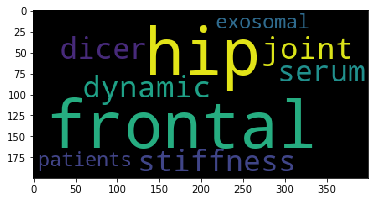

In [101]:
plt.imshow(test.word_clouds[0])

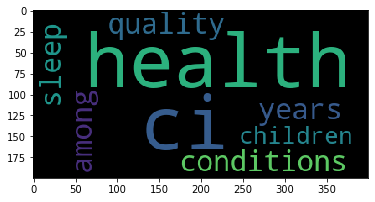

In [102]:
plt.imshow(test.word_clouds[1])

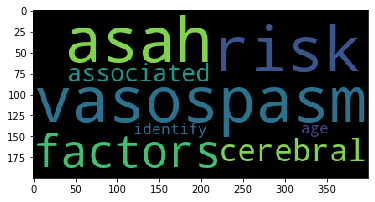

In [103]:
plt.imshow(test.word_clouds[2])

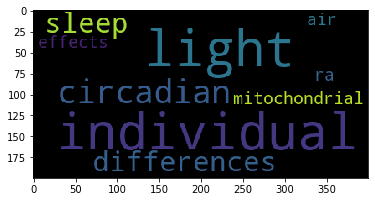

In [105]:
plt.imshow(test.word_clouds[3])

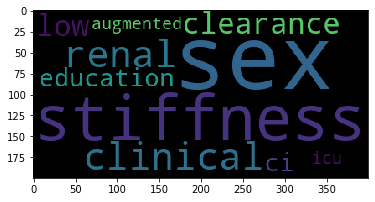

In [106]:
plt.imshow(test.word_clouds[4])